In [1]:
%matplotlib inline
import pickle
import numpy as np
from factorization import NMF
import matplotlib.pyplot as plt

/home/lizimeng/python/lib/python3.6/site-packages/IPython/nbformat.py:13: ShimWarning: The `IPython.nbformat` package has been deprecated since IPython 4.0. You should import from nbformat instead.
  "You should import from nbformat instead.", ShimWarning)


In [2]:
with open('whole_month.data', 'rb') as f:
    cf = pickle.load(f)
    cf = cf.reshape((-1,cf.shape[-1]))

# 平方误差下的调参

从10开始，以10为间隔，到200

In [ ]:
res = []
nmf = NMF(cf, 'square', True)
for r in range(10, 201, 20):
    n = 10
    tmp = []
    while n>0:
        W,H = nmf.factorize(r)
        tmp.append(nmf.RMSE())
        n -= 1
    mean = sum(tmp)/len(tmp)
    _max = max(tmp)
    _min = min(tmp)
    print([mean,_max,_min])
    res.append([mean,_max,_min])
df = pd.DataFrame(res, columns=['mean','max','min'], index=range(10, 201, 10))

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(range(5,201,5), res)
plt.show()

In [6]:
nmf = NMF(cf, 'square', True)
W,H = nmf.factorize(25)
print (nmf.RMSE())
print (nmf.sparseness())

2.03457531199
(0.4597294823529664, 0.70926057474613069)


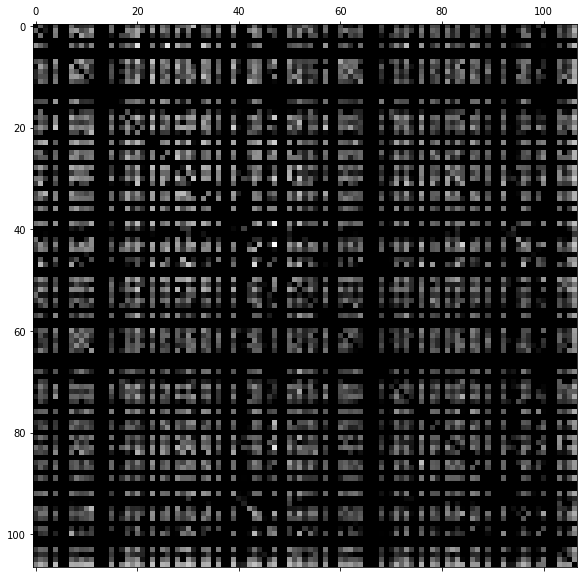

In [7]:
fig,ax = plt.subplots(figsize=(10,10))
ax.matshow(W[:,0].reshape((107,107)), cmap='gray')
plt.show()

In [5]:
107**2*36/(107**2+36)

35.88715716151502